In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# **Created synthetic data and load it**


In [ ]:
mydata = pd.read_csv('/content/drive/MyDrive/syntheticdata.csv')
mydata.head()

,RATING,PROBLEM SOLVED,CLASS
0,1678,682,2
1,1772,200,1
2,813,570,1
3,1087,614,1
4,1085,669,1


In [ ]:
print(type(mydata))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
mydata['RATING']

,RATING
0,1678
1,1772
2,813
3,1087
4,1085
...,...
194,1498
195,1261
196,1415
197,1035


In [ ]:
mydata['RATING'] = mydata['RATING'].astype(int)

In [ ]:
print(mydata['RATING'].dtype)

int64


In [8]:
print(mydata['PROBLEM SOLVED'].dtype)

int64


In [9]:
print(mydata['CLASS'].dtype)

int64


In [10]:
X = mydata.drop('CLASS', axis=1)
Y = mydata['CLASS']

In [11]:
X.head()

,RATING,PROBLEM SOLVED
0,1678,682
1,1772,200
2,813,570
3,1087,614
4,1085,669


In [12]:
Y.head()

,CLASS
0,2
1,1
2,1
3,1
4,1


In [13]:
print(Y.shape)

(199,)


# **Try to ploting the data**

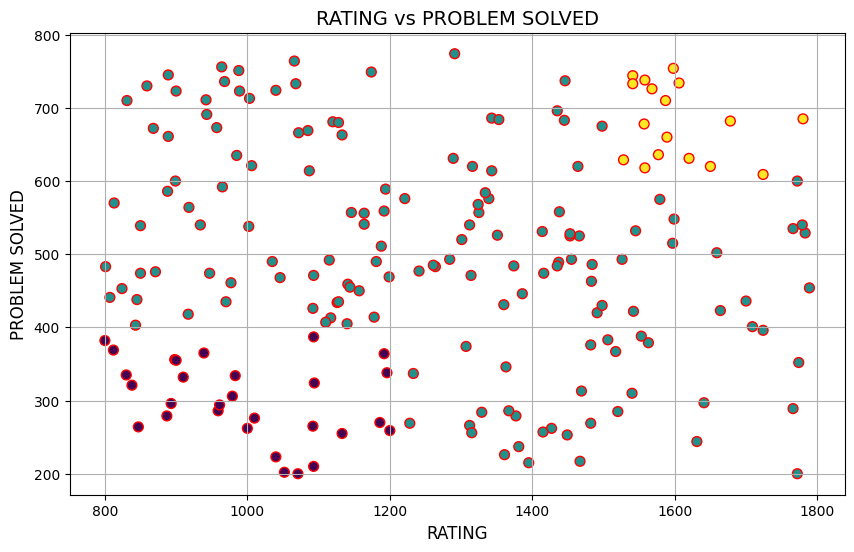

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(X['RATING'], X['PROBLEM SOLVED'], c=Y, cmap='viridis', edgecolor='r', s=50)

plt.title('RATING vs PROBLEM SOLVED', fontsize=14)
plt.xlabel('RATING', fontsize=12)
plt.ylabel('PROBLEM SOLVED', fontsize=12)

plt.grid(True)
plt.show()

In [15]:
print(Y.value_counts())

CLASS
1    153
0     29
2     17
Name: count, dtype: int64


In [16]:
class NeuralNetwork(object):
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayerNeurons1 = 10
        hiddenLayerNeurons2 = 10
        hiddenLayerNeurons3 = 10
        outLayerNeurons = 3

        self.learning_rate = 0.01
        self.W_L1I = np.random.randn(inputLayerNeurons, hiddenLayerNeurons1)#weight matrices between First hidden layer and Input.
        self.W_L2L1= np.random.randn(hiddenLayerNeurons1, hiddenLayerNeurons2)#weight matrices between Second hidden layer and First hidden layer
        self.W_L3L2 = np.random.randn(hiddenLayerNeurons2, hiddenLayerNeurons3)#weight matrices between Third hidden layer and Second hidden layer
        self.W_OL3 = np.random.randn(hiddenLayerNeurons3, outLayerNeurons)#weight matrices between Output and Third hidden layer

    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)
        else:
            return 1 / (1 + np.exp(-x))

    def relu(self, x, der=False):
        if der:
           return np.where(x > 0, 1, 0) #when x>0 ,return 1 otherwise return 0 while backpropagation
        else:
           return np.maximum(0, x)

#try to use relu but face some dificulties that is why i just use sigmoid activation function for all the layers.
    def feedForward(self, X):
        hidden_input1 = np.dot(X, self.W_L1I)
        self.hidden_output1 = self.sigmoid(hidden_input1)

        hidden_input2 = np.dot(self.hidden_output1, self.W_L2L1)
        self.hidden_output2 = self.sigmoid(hidden_input2)

        hidden_input3 = np.dot(self.hidden_output2, self.W_L3L2)
        self.hidden_output3 = self.sigmoid(hidden_input3)

        output_input = np.dot(self.hidden_output3, self.W_OL3)
        pred = self.sigmoid(output_input)
        return pred

    def backPropagation(self, X, Y, pred):

        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.sigmoid(pred, der=True) #for output layer we  use sigmoid activation function

        hidden_error3 = output_delta.dot(self.W_OL3.T)
        hidden_delta3 = self.learning_rate * hidden_error3 * self.sigmoid(self.hidden_output3, der=True)

        hidden_error2 = hidden_delta3.dot(self.W_L3L2.T)
        hidden_delta2 = self.learning_rate * hidden_error2 * self.sigmoid(self.hidden_output2, der=True)


        hidden_error1 = hidden_delta2.dot(self.W_L2L1.T)
        hidden_delta1 = self.learning_rate * hidden_error1 * self.sigmoid(self.hidden_output1, der=True)


        self.W_L1I += X.T.dot(hidden_delta1)
        self.W_L2L1 += self.hidden_output1.T.dot(hidden_delta2)
        self.W_L3L2 += self.hidden_output2.T.dot(hidden_delta3)
        self.W_OL3 += self.hidden_output3.T.dot(output_delta)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)

# **In feedForward function we got (199,3) dimensional array, so we need to reshape our Y dataframe. That is why we just convert the 1D array int0 n dimention here n is 3.Before it was  Y[i]= 0 but now it will be Y[i]= [1,0,0]. Default we will get float value that is why we just try to do type casting in integer.**

In [19]:
class_labels =3
Y_changeshape = np.eye(class_labels)[Y].astype(int)
print(Y_changeshape[:5])


[[0 0 1]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]]


<ipython-input-16-bc00559e60dd>:19: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
<ipython-input-16-bc00559e60dd>:19: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
<ipython-input-16-bc00559e60dd>:19: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
<ipython-input-16-bc00559e60dd>:19: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
<ipython-input-16-bc00559e60dd>:19: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
<ipython-input-16-bc00559e60dd>:19: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
<ipython-input-16-bc00559e60dd>:19: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
<ipython-input-16-bc00559e60dd>:19: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
<ipython-input-16-bc00559e60dd>:19: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
<ipython-i

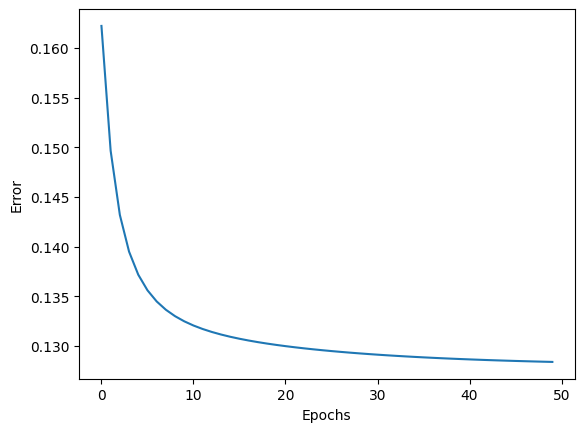

In [20]:
NN=NeuralNetwork()
errors=[]
for i in range(50):
    NN.train(X,Y_changeshape)
    errors.append(np.mean(np.square(Y_changeshape - NN.feedForward(X))))

plt.plot(errors)
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.show()